# Deep Learning TP1
### Daniel Tordjman

In [2]:
from mp1 import generate_a_disk, generate_a_triangle, generate_a_rectangle
from mp1 import generate_dataset_classification, visualize_prediction,  generate_test_set_classification, generate_dataset_regression, generate_test_set_regression
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation, UpSampling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt 
import numpy as np

Using TensorFlow backend.


## Question 1 : Simple Classification

In [7]:
def train_linear_classifier(X_train, Y_train, X_val, Y_val, optimizer='adam', verbose=True, categorical=False):
    model = Sequential()
   
    if optimizer == "sgd":
        optimizer = optimizers.SGD(lr=0.001, momentum=0.9)
    model.add(Dense(units=3, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    if not categorical:
        Y_val = to_categorical(Y_val)
    history = model.fit(X_train, to_categorical(Y_train), epochs=20, validation_data=(X_val, Y_val), verbose=verbose)
    return model, history


    

In [8]:
X_train, Y_train = generate_dataset_classification(300, 20, free_location=False)
X_val, Y_val = generate_dataset_classification(300, 20, free_location=False)

Creating data:
Creating data:


No handles with labels found to put in legend.


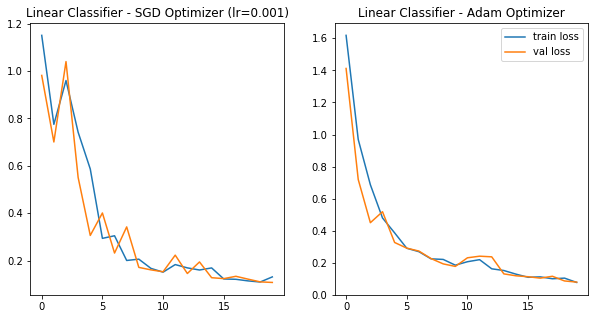

In [12]:
## SGD optimizer
model, history = train_linear_classifier(X_train, Y_train, X_val, Y_val, optimizer="sgd", verbose=False)
fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5))
left.plot(history.history['loss'], label="train loss")
left.plot(history.history['val_loss'], label="val loss")
left.set_title("Linear Classifier - SGD Optimizer (lr=0.001)")
plt.gca().legend()

## Adam Optimizer
model, history = train_linear_classifier(X_train, Y_train, X_val, Y_val, optimizer="adam", verbose=False)
right.plot(history.history['loss'], label="train loss")
right.plot(history.history['val_loss'], label="val loss")
right.set_title("Linear Classifier - Adam Optimizer")
plt.gca().legend()




Text(0.5, 1.0, 'Prediction : rectangle')

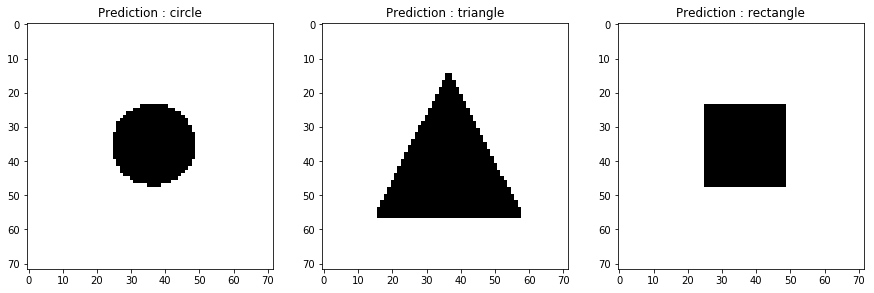

In [13]:
labels_predictions = ["rectangle", "circle", "triangle"]
fig, (left, center, right) = plt.subplots(ncols=3, figsize=(15,5))

X_test = generate_a_disk()
left.imshow(X_test.reshape((72,72)), cmap="gray")
X_test = X_test.reshape(1, X_test.shape[0])
prediction = np.argmax(model.predict(X_test))
label_pred = labels_predictions[prediction]
left.set_title("Prediction : %s" %label_pred)

X_test = generate_a_triangle()[0]
center.imshow(X_test.reshape((72,72)), cmap="gray")
X_test = X_test.reshape(1, X_test.shape[0])
prediction = np.argmax(model.predict(X_test))
label_pred = labels_predictions[prediction]
center.set_title("Prediction : %s" %label_pred)

X_test = generate_a_rectangle()
right.imshow(X_test.reshape((72,72)), cmap="gray")
X_test = X_test.reshape(1, X_test.shape[0])
prediction = np.argmax(model.predict(X_test))
label_pred = labels_predictions[prediction]
right.set_title("Prediction : %s" %label_pred)



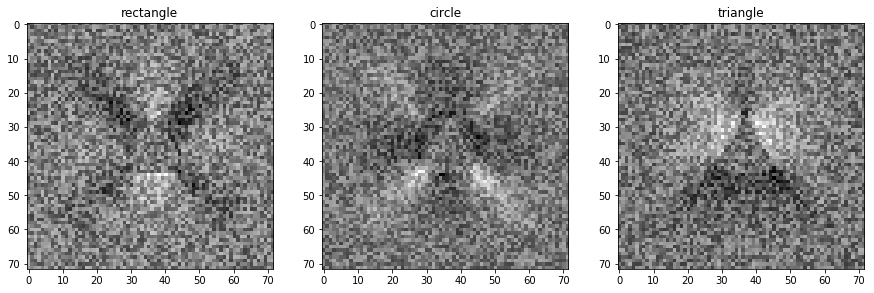

In [15]:
fig, subplots = plt.subplots(ncols=3, figsize=(15,5))
for i in range(3):
    w = np.array(model.get_weights()[0][:,i])
    w = w.reshape((72,72))
    w = (256 * (w - np.min(w)) / (np.max(w) - np.min(w)))
    subplots[i].set_title(labels_predictions[i])
    subplots[i].imshow(w, cmap="gray")


## Question 2 : a more difficult classfication problem

In [30]:
X_train, Y_train = generate_dataset_classification(2000, 20, True)
X_val, Y_val = generate_test_set_classification()

Creating data:
Creating data:


In [31]:
model, history = train_linear_classifier(X_train, Y_train, X_val, Y_val, optimizer='adam', verbose=True, categorical=True)

Train on 2000 samples, validate on 300 samples
Epoch 1/20
2000/2000 [==============================] - 0s 232us/step - loss: 1.4225 - acc: 0.4300 - val_loss: 1.0454 - val_acc: 0.4067
Epoch 2/20
2000/2000 [==============================] - 0s 86us/step - loss: 1.0188 - acc: 0.5185 - val_loss: 0.8915 - val_acc: 0.5300
Epoch 3/20
2000/2000 [==============================] - 0s 84us/step - loss: 0.8749 - acc: 0.5665 - val_loss: 1.0518 - val_acc: 0.5500
Epoch 4/20
2000/2000 [==============================] - 0s 78us/step - loss: 0.9055 - acc: 0.5795 - val_loss: 0.8037 - val_acc: 0.6067
Epoch 5/20
2000/2000 [==============================] - 0s 93us/step - loss: 0.8586 - acc: 0.5735 - val_loss: 0.9613 - val_acc: 0.5733
Epoch 6/20
2000/2000 [==============================] - 0s 82us/step - loss: 0.8271 - acc: 0.5840 - val_loss: 0.9075 - val_acc: 0.5167
Epoch 7/20
2000/2000 [==============================] - 0s 81us/step - loss: 0.8479 - acc: 0.5995 - val_loss: 0.8775 - val_acc: 0.5800
Epoch 8

Text(0.5, 1.0, 'Linear Classifier')

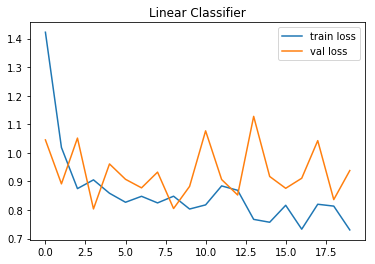

In [32]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.gca().legend()
plt.title("Linear Classifier")

In [33]:
def train_convo_classifier(X_train, Y_train, X_val, Y_val, optimizer='adam', regression="True", verbose=True):

    model = Sequential()
    X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
    X_val = X_val.reshape(300, 72, 72, 1)
    if optimizer == "sgd":
        optimizer = optimizers.SGD(lr=0.01, momentum=0.9)
   
    model.add(Conv2D(filters=6, kernel_size=5, activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=16, kernel_size=5, activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=4, kernel_size=5, activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(units=1000, activation="relu"))
    
    model.add(Dense(units=3, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, to_categorical(Y_train), epochs=20, validation_data=(X_val, Y_val), verbose=verbose)
    return model, history



Train on 2000 samples, validate on 300 samples
Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.9848 - acc: 0.4975 - val_loss: 0.8493 - val_acc: 0.5800
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7814 - acc: 0.6135 - val_loss: 0.7045 - val_acc: 0.6000
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6876 - acc: 0.6370 - val_loss: 0.6168 - val_acc: 0.6600
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6167 - acc: 0.6825 - val_loss: 0.5402 - val_acc: 0.7200
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5186 - acc: 0.7275 - val_loss: 0.4457 - val_acc: 0.7767
Epoch 6/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4368 - acc: 0.8040 - val_loss: 0.4934 - val_acc: 0.7433
Epoch 7/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3699 - acc: 0.8445 - val_loss: 0.2801 - val_acc: 0.8967
Epoch 8/20
2000

Text(0.5, 1.0, 'Convolutional Classifier')

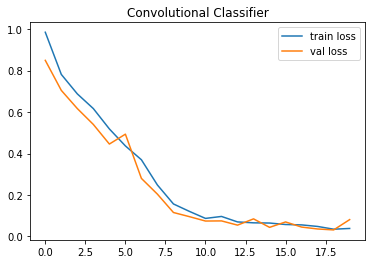

In [34]:
model, history = train_convo_classifier(X_train, Y_train, X_val, Y_val, optimizer='adam', verbose=True)
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.gca().legend()
plt.title("Convolutional Classifier")

## Question 3: A regression problem 

In [3]:
def sort_vertices(y):
    x_ = y[[0,2,4]]
    y_ = y[[1,3,5]]
    angles = []
    params = {}
    for i in range(3):
        angle = np.arctan2(y_[i],x_[i]) 
        angles += [angle]
        params[angle] = [x_[i], y_[i]]
 
    vertices = [value for (key, value) in sorted(params.items())]
   
    
    return np.array(vertices).flatten()

X_train, Y_train = generate_dataset_regression(10000, 20)
X_val, Y_val = generate_test_set_regression()

Y_train = np.array([sort_vertices(y) for y in Y_train])
Y_val = np.array([sort_vertices(y) for y in Y_val])


Creating data:
Creating data:


In [37]:



def train_conv_regression(X_train, Y_train, X_val, Y_val, optimizer="adam"):
    model = Sequential()
    X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
    X_val = X_val.reshape(X_val.shape[0], 72, 72, 1)
    if optimizer == "sgd":
        optimizer = optimizers.SGD(lr=0.01, momentum=0.9)
   
    model.add(Conv2D(filters=6, kernel_size=5, activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=16, kernel_size=5, activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=4, kernel_size=5, activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(units=1000, activation="relu"))
   
   
    model.add(Dense(units=6))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))
    return model, history

model, history = train_conv_regression(X_train, Y_train, X_val, Y_val, optimizer='adam')


Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 33s 3ms/step - loss: 0.0383 - val_loss: 0.0205
Epoch 2/20
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0191 - val_loss: 0.0138
Epoch 3/20
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0150 - val_loss: 0.0114
Epoch 4/20
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0135 - val_loss: 0.0108
Epoch 5/20
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0124 - val_loss: 0.0092
Epoch 6/20
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 7/20
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0109 - val_loss: 0.0094
Epoch 8/20
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 9/20
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 

Text(0.5, 1.0, 'Convolutional Regression')

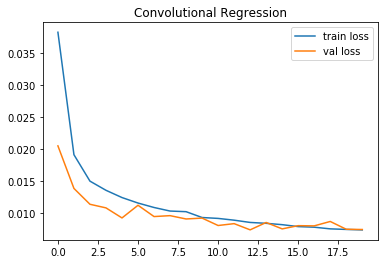

In [38]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.gca().legend()
plt.title("Convolutional Regression")

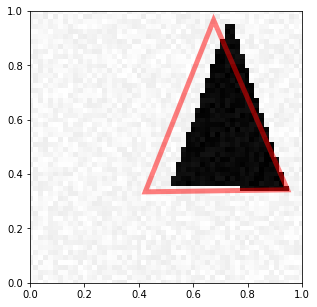

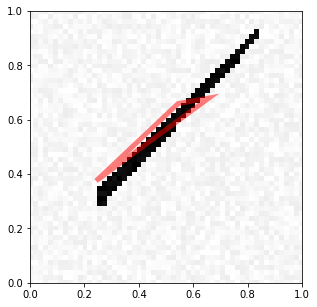

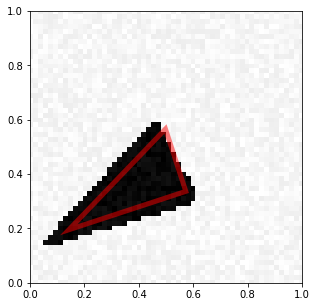

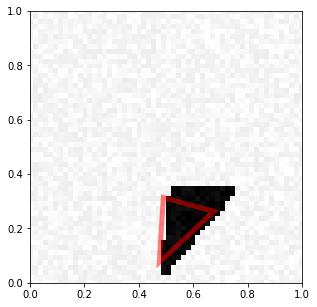

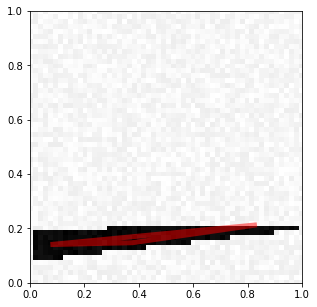

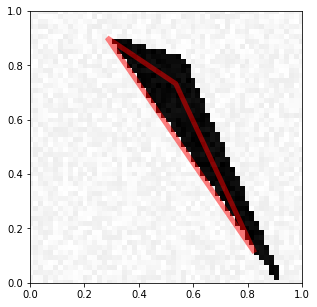

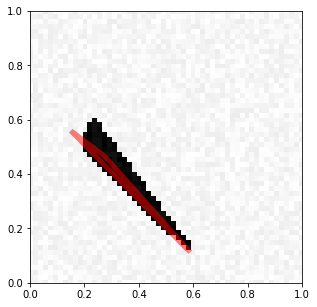

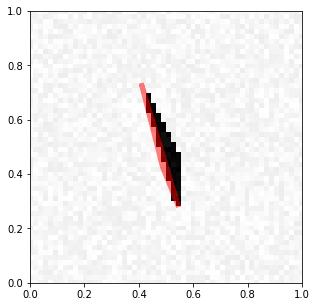

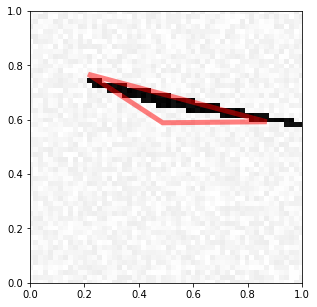

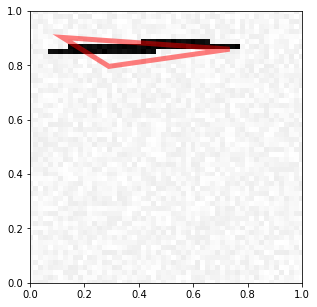

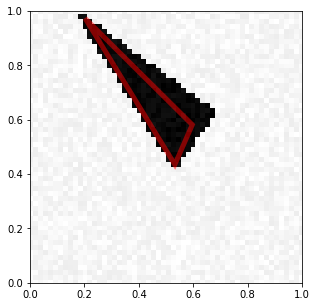

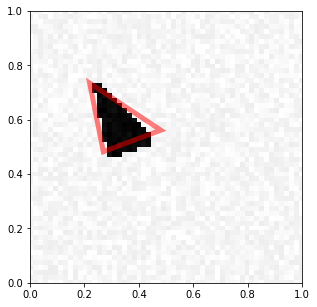

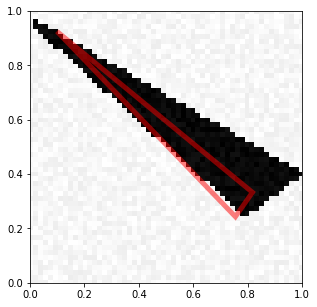

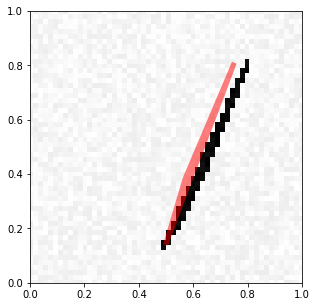

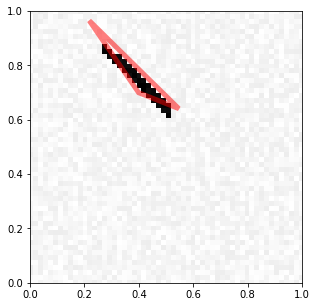

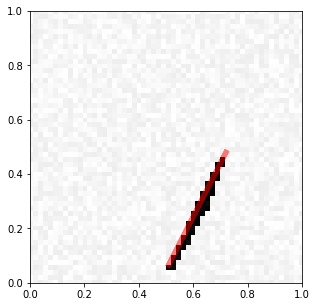

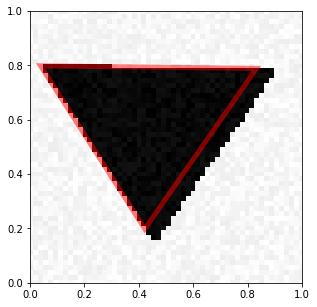

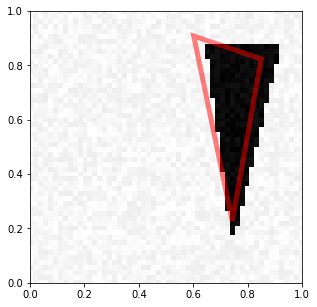

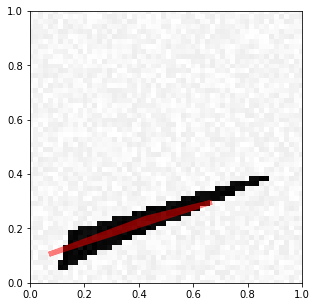

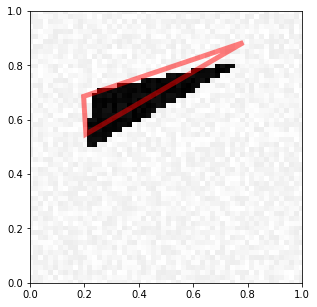

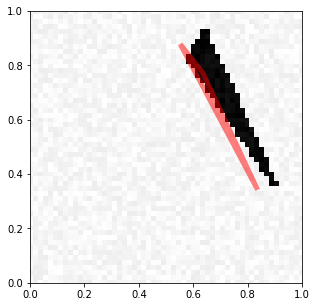

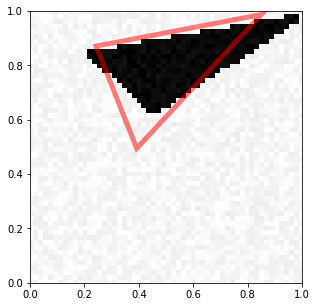

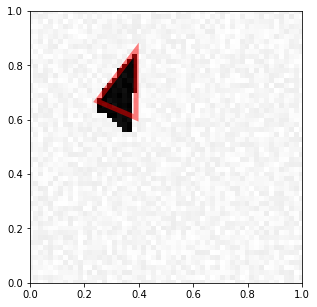

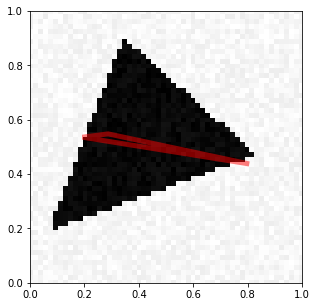

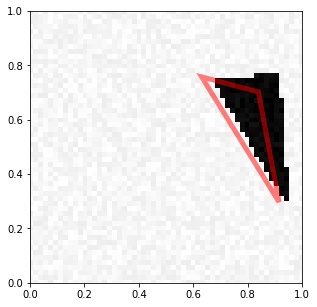

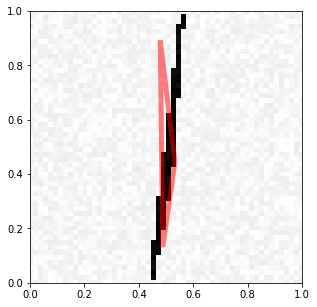

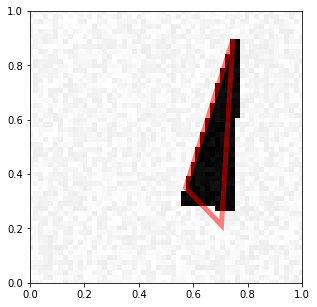

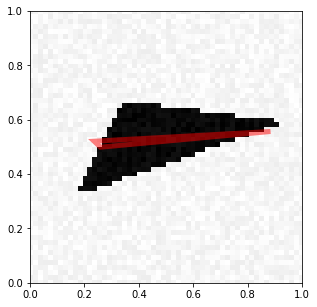

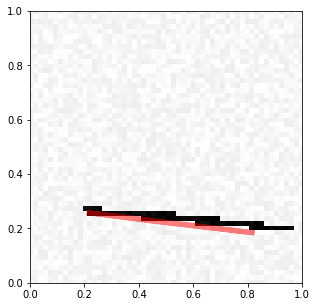

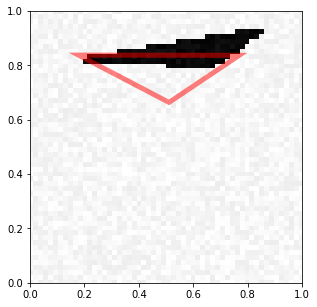

In [41]:
pred = model.predict(X_val.reshape(X_val.shape[0], 72, 72, 1))
for i in range(30):
    i = np.random.choice(range(len(pred)))
    visualize_prediction(X_val[i], pred[i])


## Question 4 : Image Denoising

In [23]:
def generate_dataset_denoising(noise=20.0, nb_samples=100, verbose=True, free_location=True):

   
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros((nb_samples, 5184))
    Y = np.zeros((nb_samples, 5184))
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0 and verbose:
            print(i)
        
        category = np.random.randint(3)
        np.random.seed(i)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1:
            X[i] = generate_a_disk(noise, free_location)
        else:
            X[i] = generate_a_triangle(noise, free_location)[0]
            
        np.random.seed(i)
        if category == 0:
            Y[i] = generate_a_rectangle(0., free_location)
        elif category == 1:
            Y[i] = generate_a_disk(0., free_location)
        else:
            Y[i] = generate_a_triangle(0., free_location)[0]
    X = np.array(X)
    Y = np.array(Y)
    
    X = (X + noise) / (255. + 2 * noise)
    Y = (Y) / (255.)
   
    train_indices = np.random.choice(nb_samples, size = round(0.8 * nb_samples), replace=False)
    val_indices = [i for i in range(nb_samples) if i not in train_indices]
   
    X_train, Y_train = X[train_indices], Y[train_indices]
    X_val, Y_val = X[val_indices], Y[val_indices]
    
    return [X_train, Y_train, X_val, Y_val]
   


Creating data:


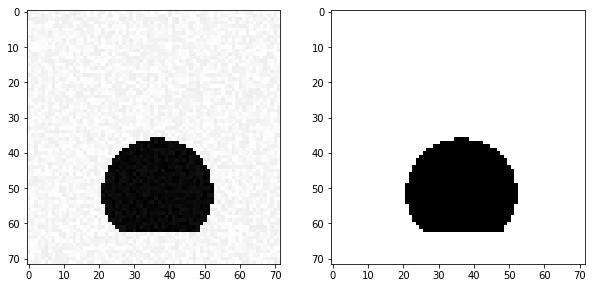

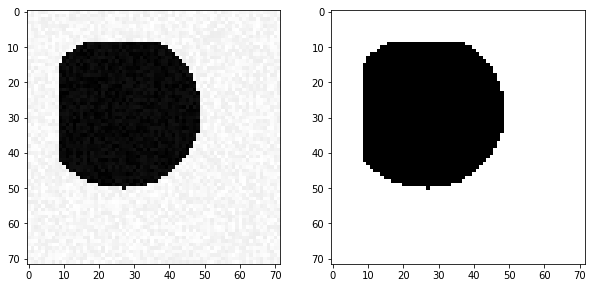

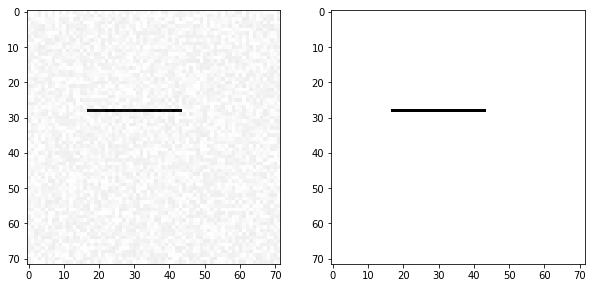

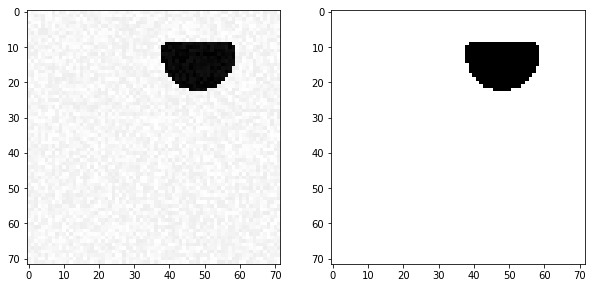

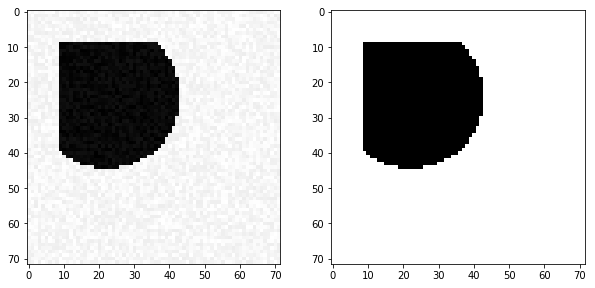

In [21]:
X_train, Y_train, X_val, Y_val  = generate_dataset_denoising(nb_samples=5000, noise=20., verbose=False)

for i in range(5):
    x, y = np.array(X_train[i]), np.array(Y_train[i])
    fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5))
    right.imshow(y.reshape(72,72), cmap='gray')
    left.imshow(x.reshape(72,72), cmap='gray')
    

In [22]:
def train_hourglass_network(X_train, Y_train, X_val, Y_val, optimizer='adam', epochs=10):
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', padding="same")) 
    model.add(MaxPooling2D((2, 2), padding="same"))
    model.add(Conv2D(8, (5, 5), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2)))
    
   
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (3,3), activation="sigmoid", padding="same"))
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val))
    return model, history

X_train = X_train.reshape((X_train.shape[0], 72, 72, 1))
Y_train = Y_train.reshape((Y_train.shape[0], 72, 72, 1))

X_val = X_val.reshape((X_val.shape[0], 72, 72, 1))
Y_val = Y_val.reshape((Y_val.shape[0], 72, 72, 1))

model, history = train_hourglass_network(X_train, Y_train, X_val, Y_val)


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 40s 10ms/step - loss: 0.0730 - val_loss: 0.0342
Epoch 2/10
4000/4000 [==============================] - 34s 9ms/step - loss: 0.0183 - val_loss: 0.0093
Epoch 3/10
4000/4000 [==============================] - 33s 8ms/step - loss: 0.0060 - val_loss: 0.0049
Epoch 4/10
4000/4000 [==============================] - 30s 8ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 5/10
4000/4000 [==============================] - 30s 8ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 6/10
4000/4000 [==============================] - 32s 8ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 7/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 8/10
4000/4000 [==============================] - 33s 8ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 9/10
4000/4000 [==============================] - 35s 9ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/10
4000/4000 [=

Text(0.5, 1.0, 'Denoising')

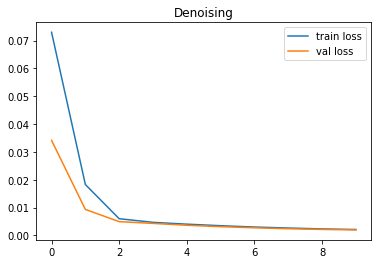

In [24]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.gca().legend()
plt.title("Denoising")

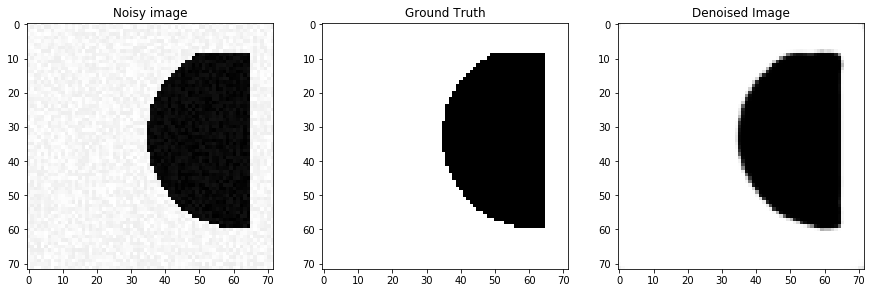

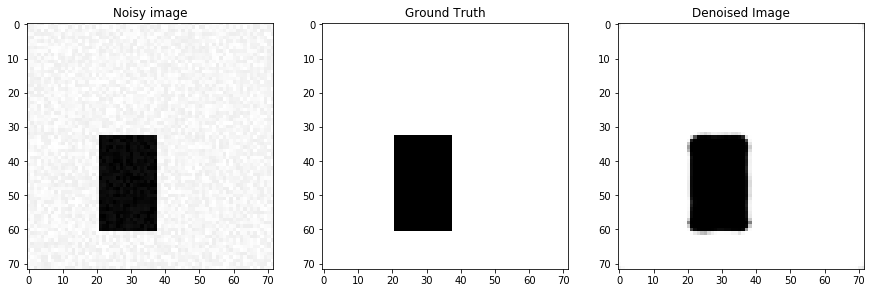

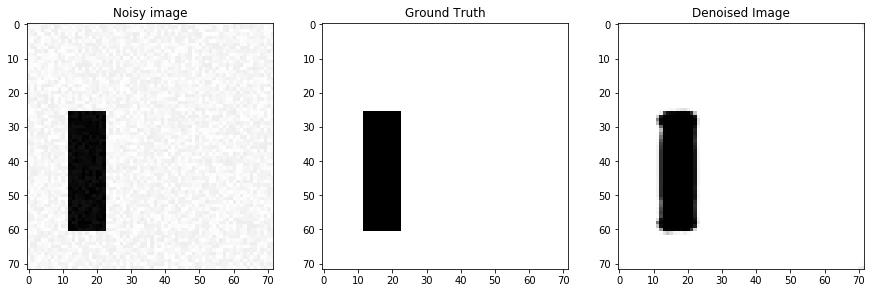

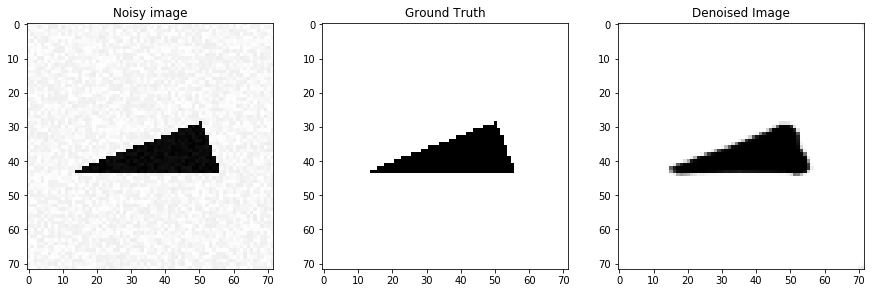

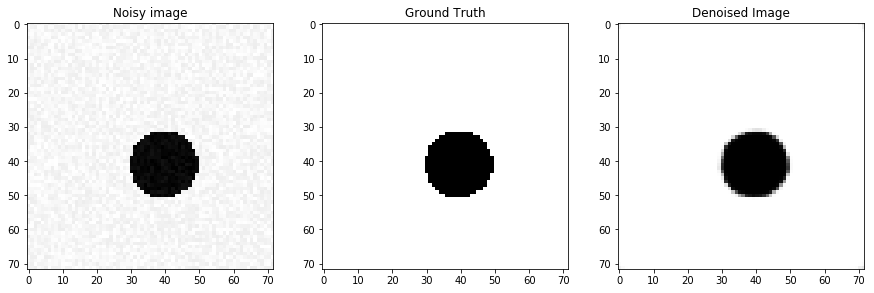

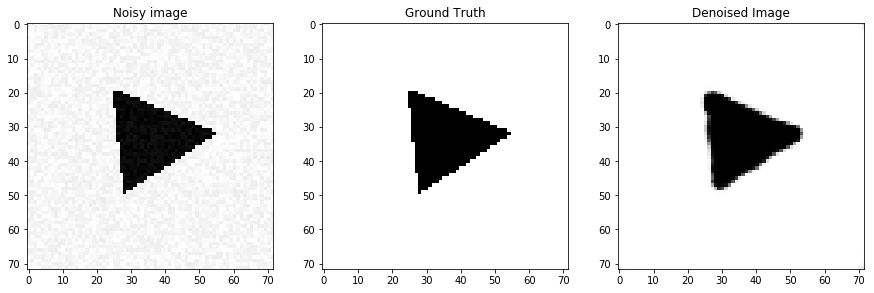

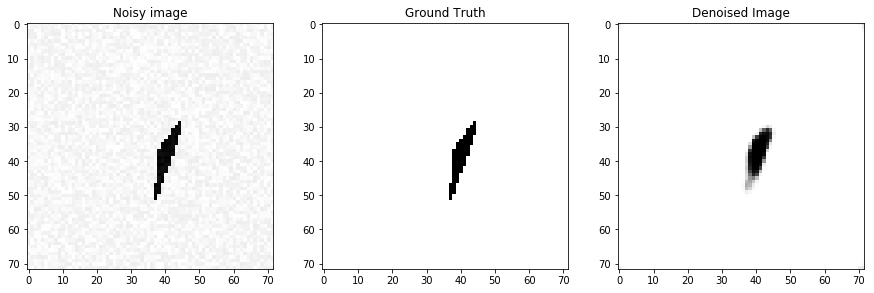

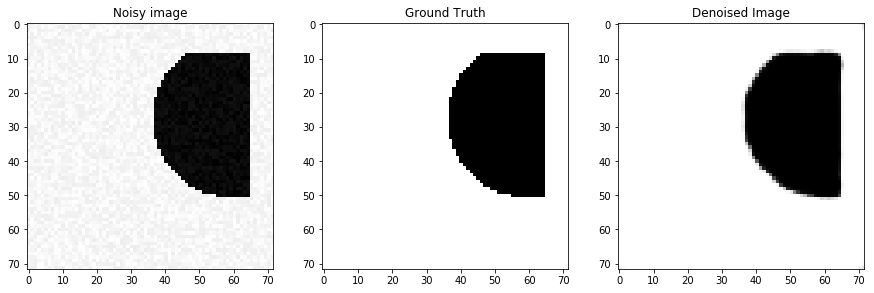

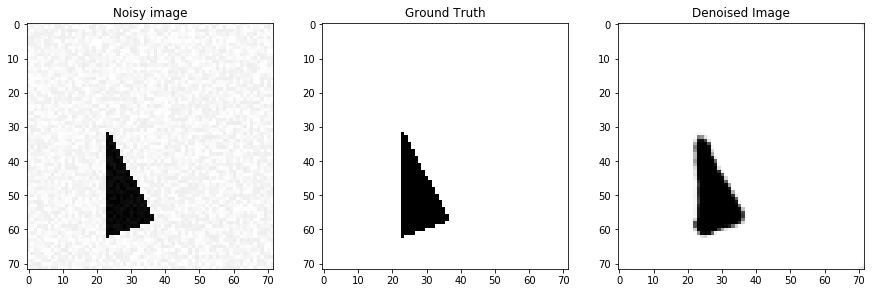

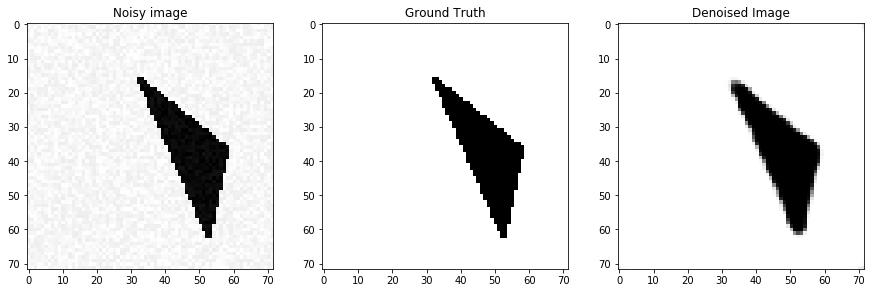

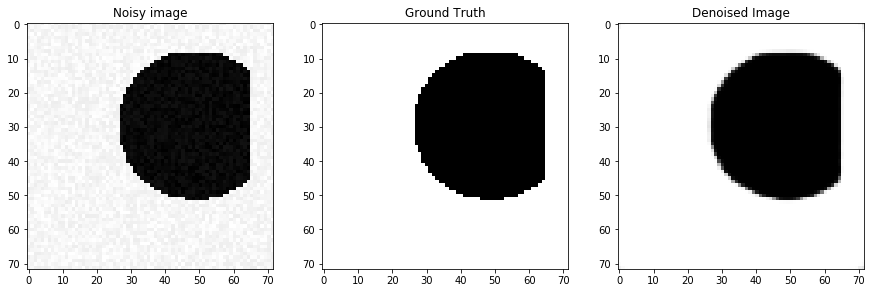

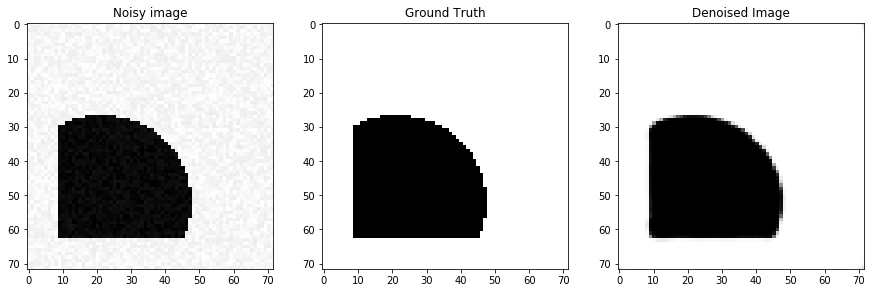

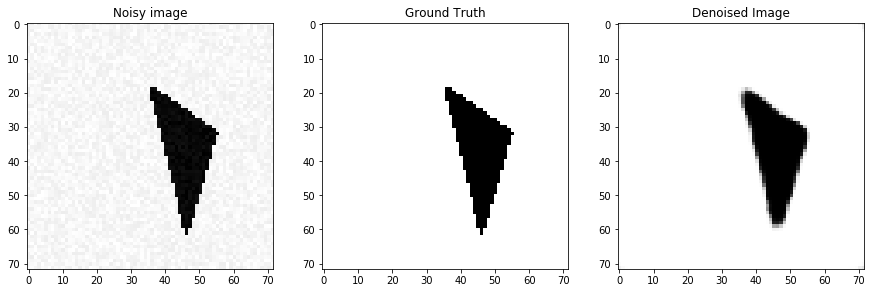

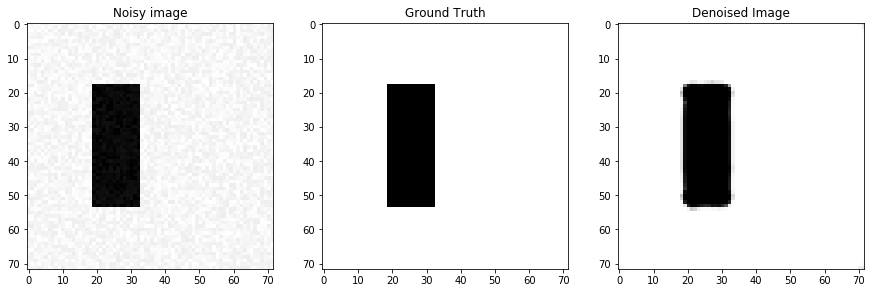

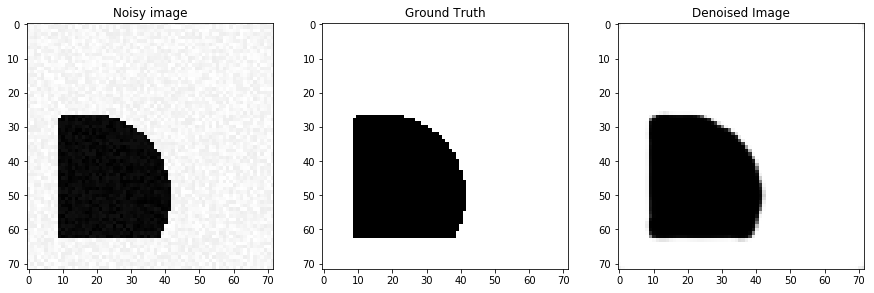

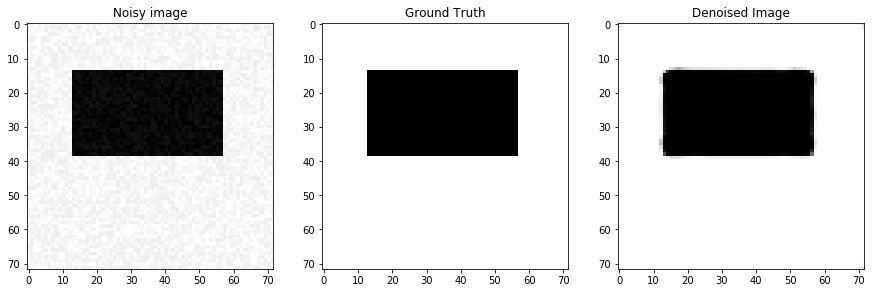

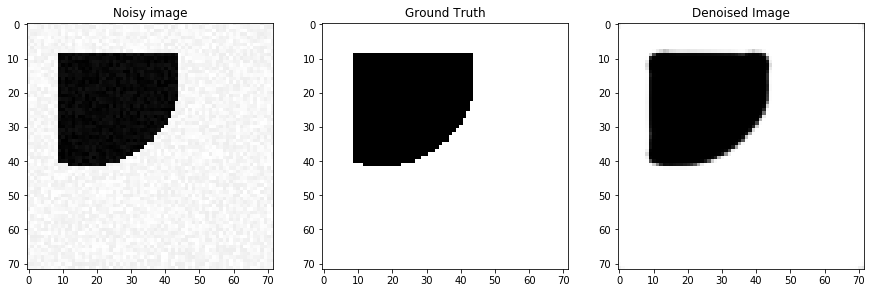

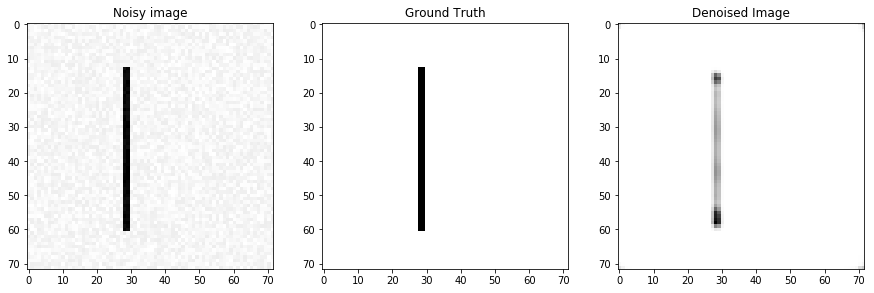

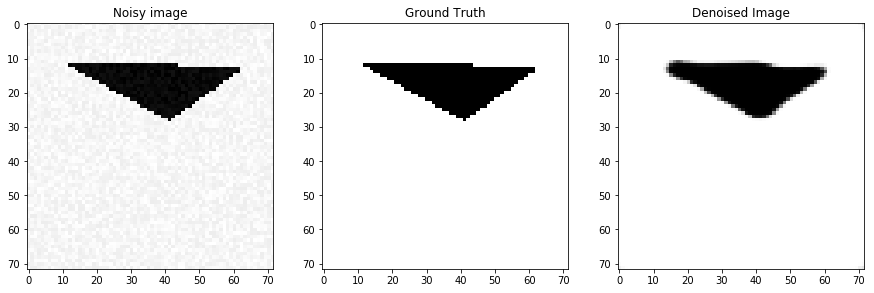

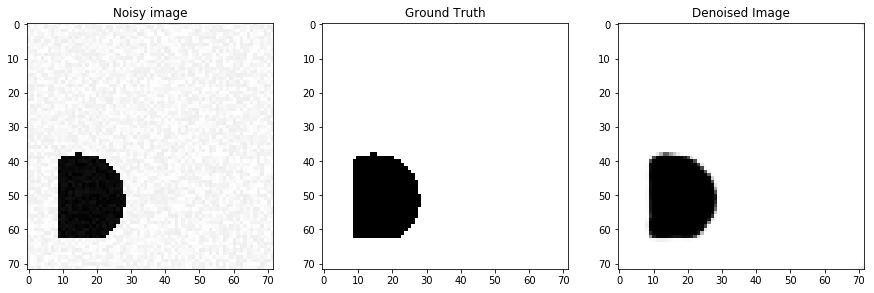

In [10]:
pred = model.predict(X_val)
for i in range(20):
    fig, (left, center, right) = plt.subplots(ncols=3, figsize=(15,5))
    left.imshow(X_val[i].reshape(72,72), cmap='gray')
    center.imshow(Y_val[i].reshape(72,72), cmap='gray')
    right.imshow(pred[i].reshape(72,72), cmap='gray')
    left.set_title("Noisy image")
    center.set_title("Ground Truth")
    right.set_title("Denoised Image")
    

Creating data:


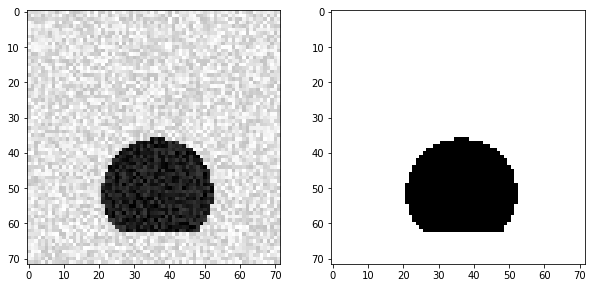

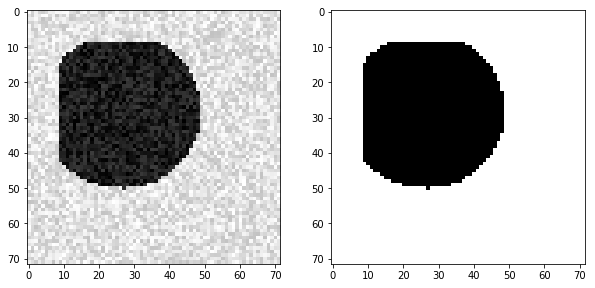

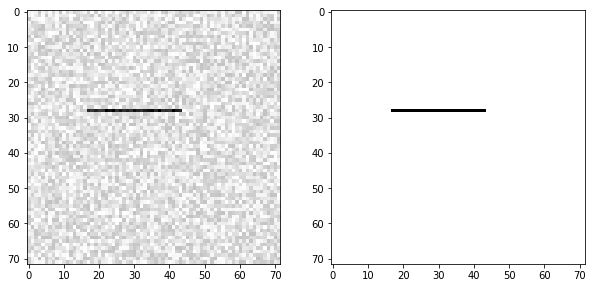

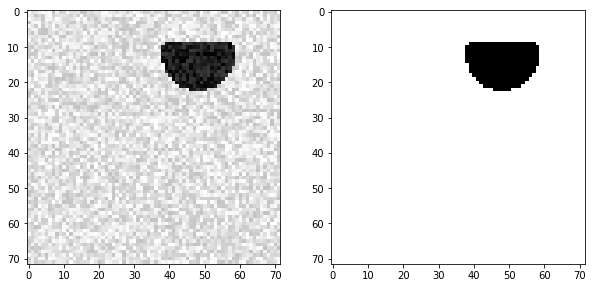

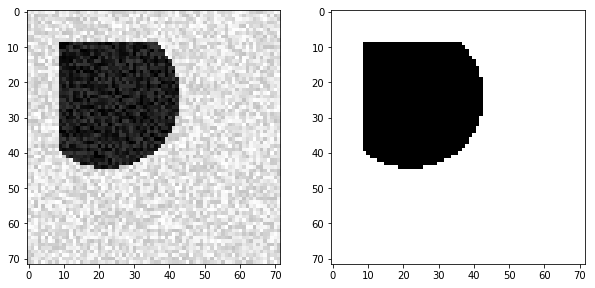

In [12]:
X_train, Y_train, X_val, Y_val  = generate_dataset_denoising(nb_samples=5000, noise=80., verbose=False)

for i in range(5):
    x, y = np.array(X_train[i]), np.array(Y_train[i])
    fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5))
    right.imshow(y.reshape(72,72), cmap='gray')
    left.imshow(x.reshape(72,72), cmap='gray')

In [15]:
X_train = X_train.reshape((X_train.shape[0], 72, 72, 1))
Y_train = Y_train.reshape((Y_train.shape[0], 72, 72, 1))

X_val = X_val.reshape((X_val.shape[0], 72, 72, 1))
Y_val = Y_val.reshape((Y_val.shape[0], 72, 72, 1))

model, history = train_hourglass_network(X_train, Y_train, X_val, Y_val, epochs=20)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0526 - val_loss: 0.0084
Epoch 2/20
4000/4000 [==============================] - 40s 10ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 3/20
4000/4000 [==============================] - 35s 9ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 4/20
4000/4000 [==============================] - 33s 8ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 5/20
4000/4000 [==============================] - 29s 7ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 6/20
4000/4000 [==============================] - 30s 7ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 7/20
4000/4000 [==============================] - 30s 7ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 8/20
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/20
4000/4000 [==============================] - 30s 8ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/20
4000/4000 [=

Text(0.5, 1.0, 'Denoising')

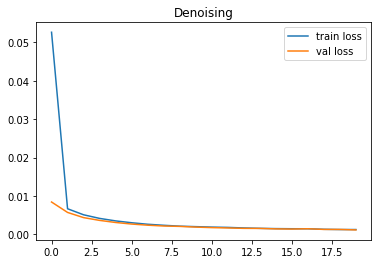

In [16]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.gca().legend()
plt.title("Denoising")

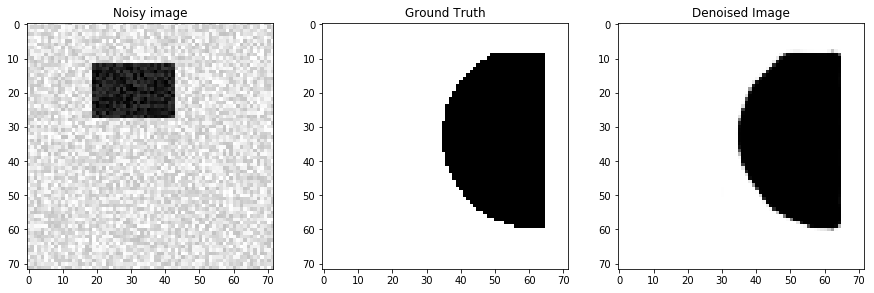

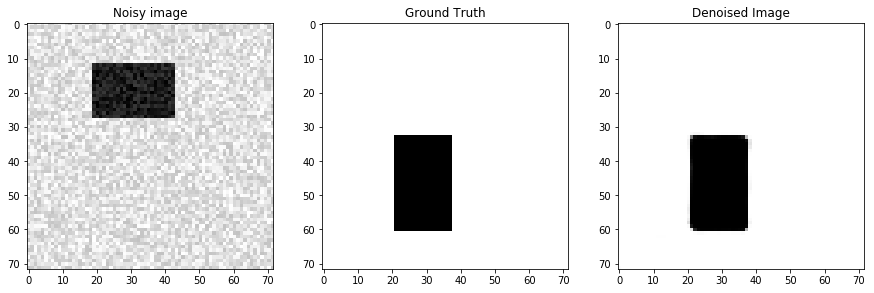

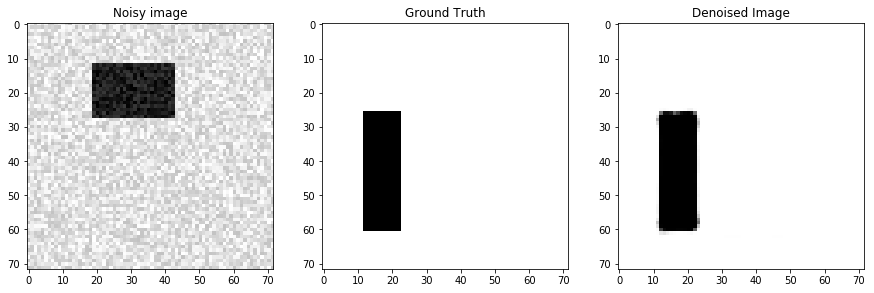

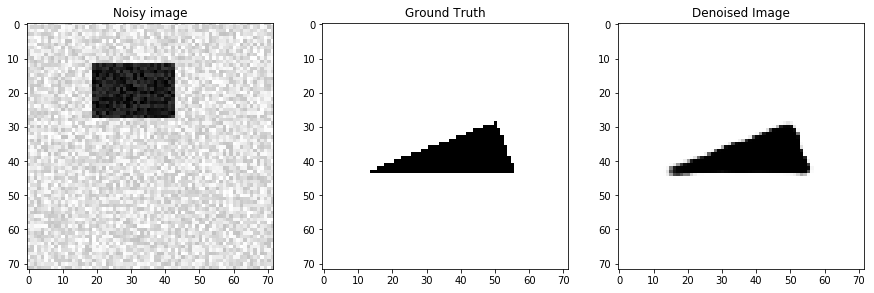

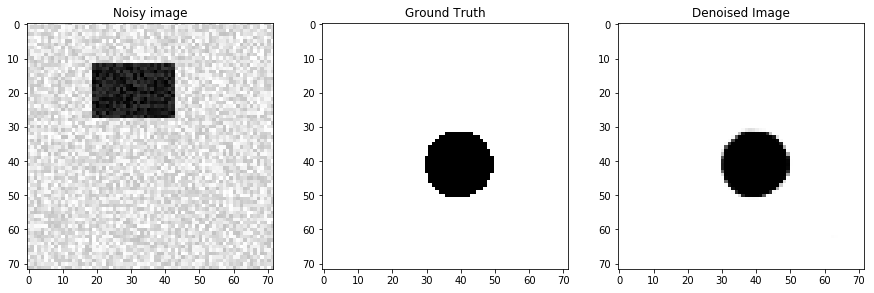

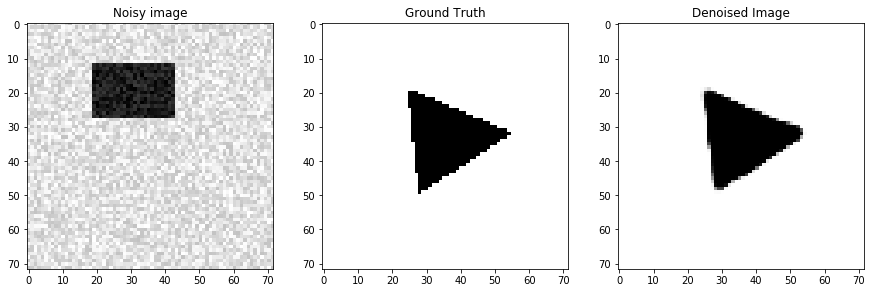

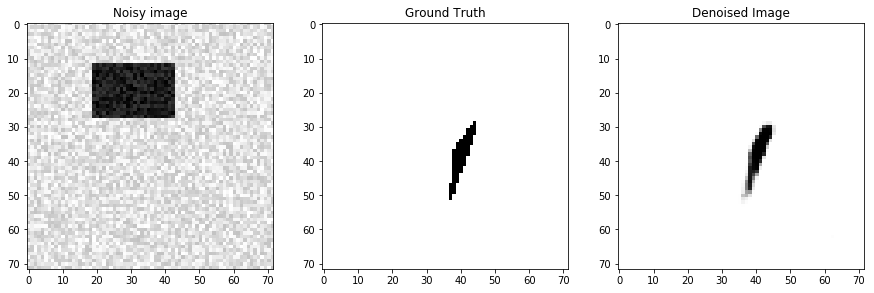

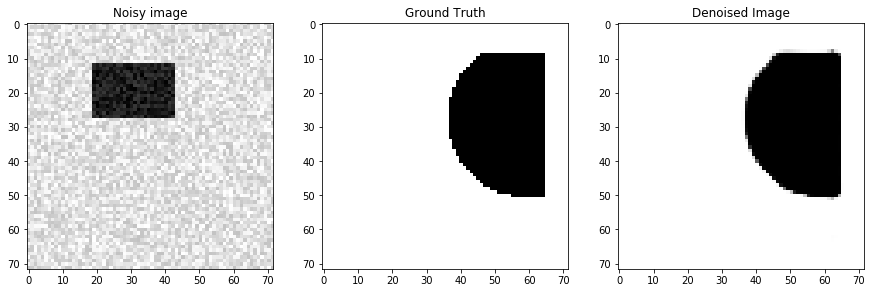

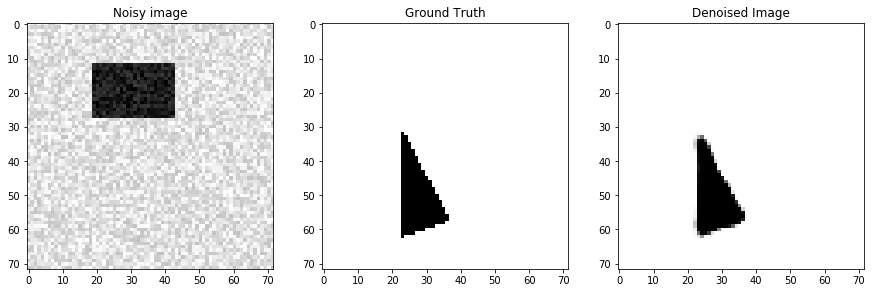

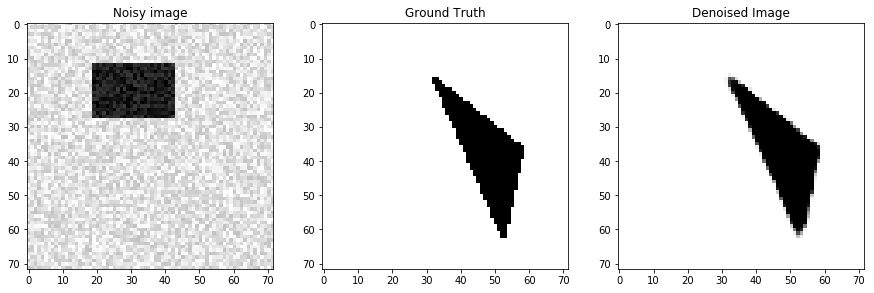

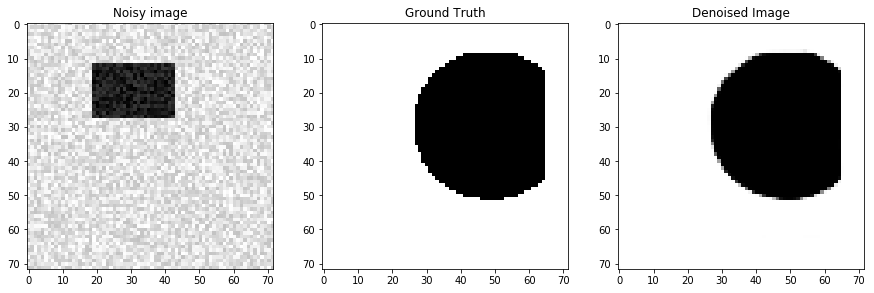

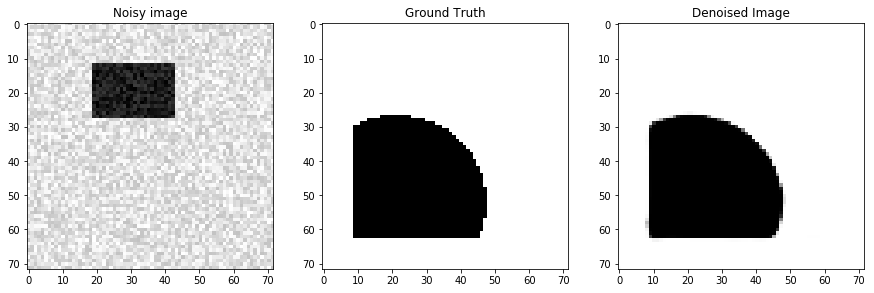

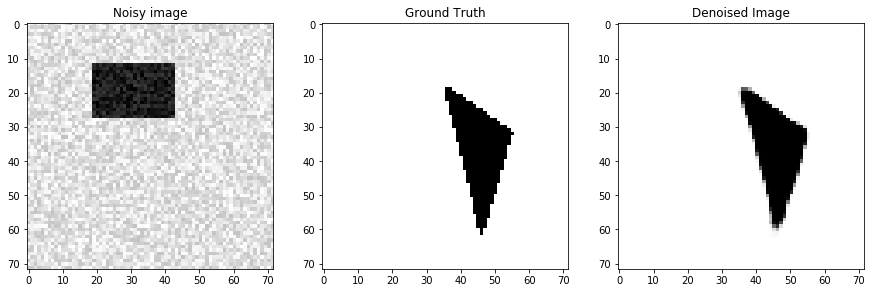

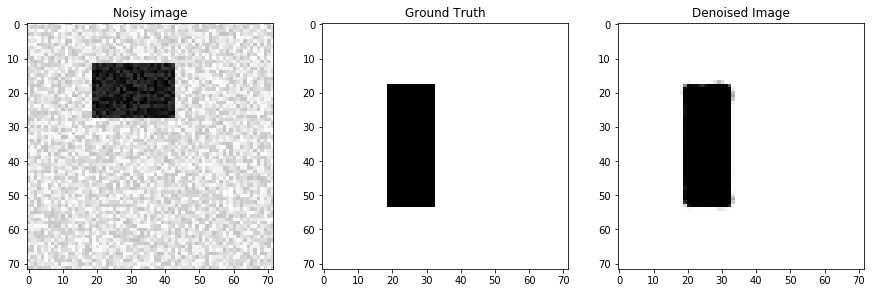

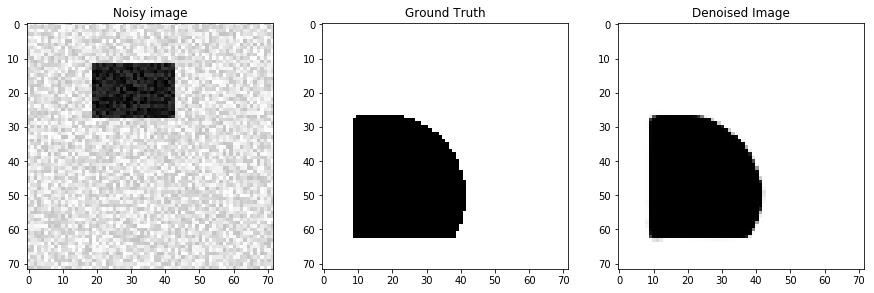

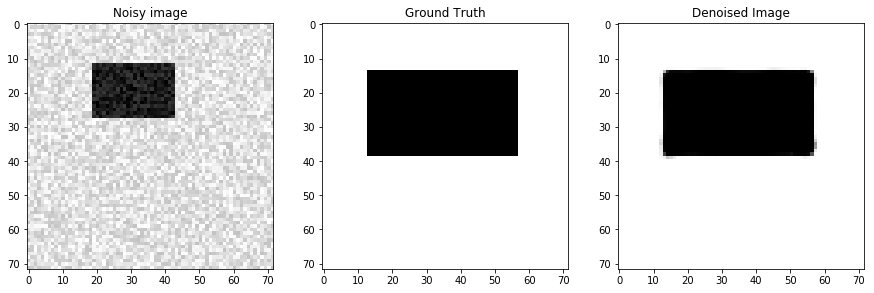

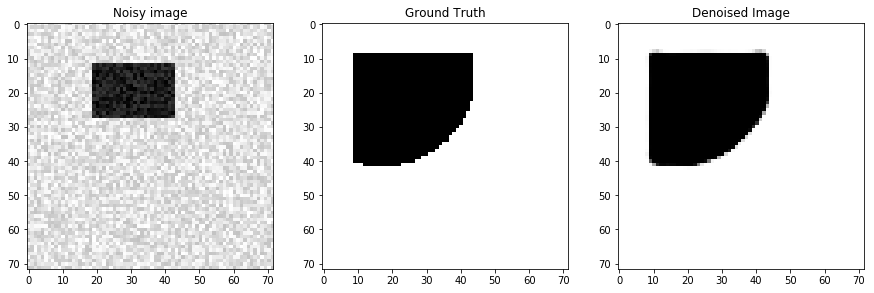

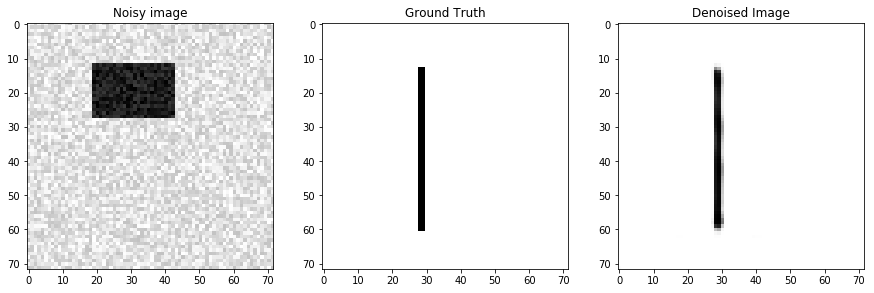

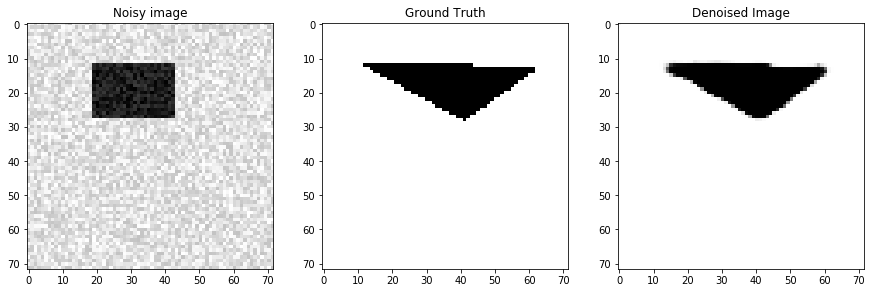

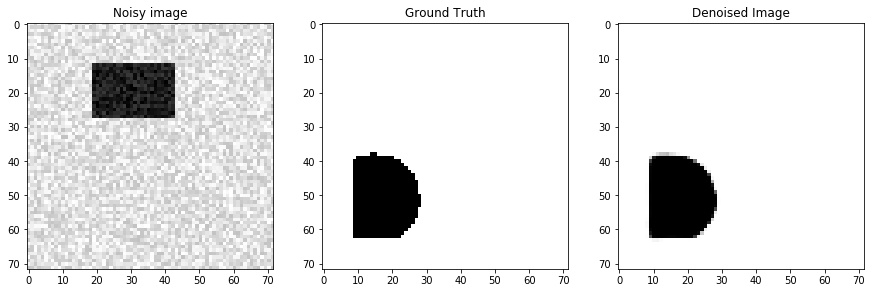

In [18]:
pred = model.predict(X_val)
for i in range(20):
    fig, (left, center, right) = plt.subplots(ncols=3, figsize=(15,5))
    left.imshow(x.reshape(72,72), cmap='gray')
    center.imshow(Y_val[i].reshape(72,72), cmap='gray')
    right.imshow(pred[i].reshape(72,72), cmap='gray')
    left.set_title("Noisy image")
    center.set_title("Ground Truth")
    right.set_title("Denoised Image")
    